In [57]:
import numpy as np
from scipy.stats import multivariate_normal as smn
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# |First we generated 10 means mk from a bivariate 
# |Gaussian distribution N((1,0),I) and labeled this class BLUE.
blue_means = np.array([[-0.76984456,  0.68481421], [ 1.31595023, -0.01524395], [-0.79998303, -1.25341062],
                       [ 0.1273859 , -1.59067228], [ 0.47416484,  0.46370937], [ 1.44923019, -1.25015962],
                       [ 0.38579432,  1.09808155], [ 0.79655758, -0.46856294], [ 0.14509522, -0.21230019],
                       [ 1.63124273,  1.50124375]])
# |Similarly, 10 more were drawn from N((0,1),I) and labeled class ORANGE.
brown_means = np.array([[-0.6227393 ,  0.7150955 ], [ 0.82851254,  0.57659957], [ 0.34909186,  1.38040508],
                        [ 2.73571771,  1.50710081], [-1.2294235 ,  1.44724384], [ 0.74378907,  1.47081486],
                        [-1.55691576,  1.17149161], [ 1.01165209,  0.07333176], [-1.36259986,  1.19934271],
                        [-0.81420616,  1.32166231]])

In [3]:
# we'll use GaussianMixture for random sampling 
means = np.vstack((blue_means, brown_means))
gm = GaussianMixture(n_components=20, covariance_type='spherical', means_init=means)
gm.fit(means)
gm.covariances_ = [1/5]*20

def sample(n):
    X, Y = gm.sample(n)
    Y = 1*(Y>=10)
    return X, Y

# |Then for each class we generated 100 observations as follows: for each observation, 
# |we picked an mk at random with probability 1/10, and then generated a N(mk,I/5), 
# |thus leading to a mixture of Gaussian clusters for each class.
X_train, Y_train = sample(200)
X_test, Y_test = sample(10000)

In [87]:
BLUE, ORANGE = '#57B5E8', '#E69E00'
def prepare_plot(X, Y):
    fig, ax1 = plt.subplots(figsize=(3.35, 3.1), dpi=110)
    ax1.scatter(X[:,0], X[:,1], s=18, facecolors='none', edgecolors=np.array([BLUE, ORANGE])[Y])
    ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
    ax1.set_xlim(-2, 3)
    ax1.set_ylim(-2, 3)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    return fig, ax1

(<matplotlib.figure.Figure at 0x22940cba2b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x229420bcda0>)

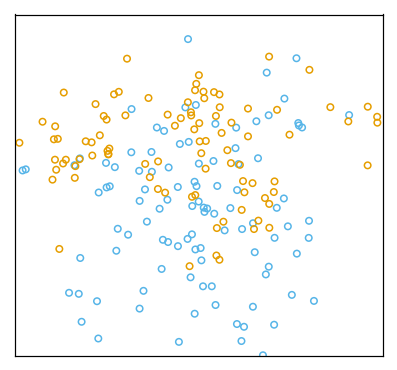

In [88]:
prepare_plot(X_train, Y_train)

In [89]:
def optimal_bayes_predict(X):
    cov = np.eye(2)/5
    p_blue = np.sum(np.array([smn.pdf(X, blue_means[j], np.eye(2)/5) for j in range(10)]), axis=0)
    p_brown = np.sum(np.array([smn.pdf(X, brown_means[j], np.eye(2)/5) for j in range(10)]), axis=0)
    y_hat = 1*(p_brown>p_blue)
    return y_hat

In [90]:
accuracy_score(Y_test, optimal_bayes_predict(X_test))

0.7793

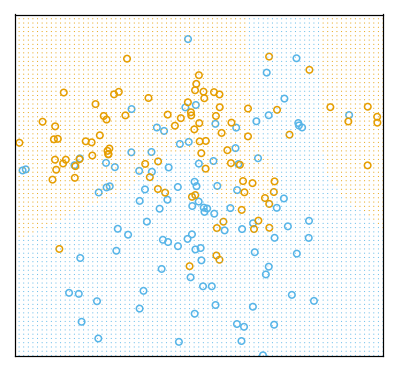

In [91]:
vals = np.linspace(-2, 3, 81)
X_grid = np.transpose([np.tile(vals, len(vals)), np.repeat(vals, len(vals))])
Y_grid = optimal_bayes_predict(X_grid)
fig, ax1 = prepare_plot(X_train, Y_train)
ax1.scatter(X_grid[:,0], X_grid[:,1], marker='.', lw=0, s=2, c=np.array([BLUE, ORANGE])[Y_grid])